In [1]:
import uproot
import h5py
import numpy as np
import os
import re
import awkward as awk
import heplot as hepl
import importlib
import glob
from heplot import plotting as heplt
import sys
sys.path.append('..')

In [4]:
import src.selection as sele
import src.string_constants as stco
import src.generator as gene
import src.reader as read

# read samples

# mc

In [8]:
feature_names = ['el_e','mu_e','el_charge','mu_charge','el_pt','mu_pt', 'el_phi','mu_phi',\
                      'el_eta', 'mu_eta', 'jet_e', 'jet_pt', 'jet_GN2_pu', 'jet_GN2_pb', 'jet_GN2_pc']

### read MC (signal and background)

## signal (one file per ee, mumu, tautau)

# read electron samples
path_ee = glob.glob(os.path.join(stco.in_dir_mc,'*'+stco.ds_ids_sig['ee'][0]+'*'))[0]
fname_ee = os.listdir(path_ee)[3]
samples_ee = read.read_samples_from_file(os.path.join(path_ee,fname_ee),feature_names)

In [9]:
samples = sele.select_lightjets(samples_ee)

In [13]:
jet_fields = [field for field in samples.fields if 'jet_' in field]

In [15]:
awk.to_numpy(awk.num(samples[jet_fields]))

array([(5, 5, 5, 5, 5), (2, 2, 2, 2, 2), (2, 2, 2, 2, 2), ...,
       (4, 4, 4, 4, 4), (2, 2, 2, 2, 2), (5, 5, 5, 5, 5)],
      dtype=[('jet_e', '<i8'), ('jet_pt', '<i8'), ('jet_GN2_pu', '<i8'), ('jet_GN2_pb', '<i8'), ('jet_GN2_pc', '<i8')])

In [20]:
# all features starting with 'jet_' have length len(jets)
rr = awk.to_numpy(awk.num(samples[jet_fields]))
print(all(len(set(r)) == 1 for r in rr))

True


In [21]:
leading_jet_mask = awk.argmax(samples['jet_pt'],axis=1,keepdims=True)

In [22]:
leading_jet_mask

<Array [[0], [0], [0], [0], ..., [0], [0], [0]] type='1624844 * 1 * ?int64'>

In [25]:
for jet_field in jet_fields:
    samples[jet_field+'_lead'] = samples[jet_field][leading_jet_mask]

## data

In [4]:
N_batch = int(1e3)
N_total = int(1e4)
generator_ee = gene.sample_generator([stco.in_dir_data], N_batch, selection_fun=sele.select_lightjets)

samples_concat = None

for sample_batch in generator_ee:

    if samples_concat is None:
        samples_concat = sample_batch
    else:
        samples_concat = awk.concatenate([samples_concat,sample_batch])

    if len(samples_concat) >= N_total:
        break

print(f'{len(samples_concat)} data samples read')


AttributeError: module 'src.string_constants' has no attribute 'in_dir_data'

In [ ]:
leading_jet_mask = awk.argmax(samples_concat['jet_pt'],axis=1,keepdims=True)

In [5]:
jet_fields = [field for field in samples_concat.fields if 'jet_' in field]

In [6]:
for jet_field in jet_fields:
    samples_concat[jet_field+'_lead'] = samples_concat[jet_field][leading_jet_mask]

In [7]:
awk.to_numpy(awk.num(samples_concat[jet_fields]))

array([(2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2),
       (3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3),
       (2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2),
       ...,
       (1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1),
       (2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2),
       (1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)],
      dtype=[('jet_pt', '<i8'), ('jet_eta', '<i8'), ('jet_phi', '<i8'), ('jet_e', '<i8'), ('jet_jvt', '<i8'), ('jet_truthflavExtended', '<i8'), ('jet_SV1_masssvx', '<i8'), ('jet_SV1_NGTinSvx', '<i8'), ('jet_dips_pu', '<i8'), ('jet_dips_pb', '<i8'), ('jet_dips_pc', '<i8'), ('jet_dipsflip_pu', '<i8'), ('jet_dipsflip_pb', '<i8'), ('jet_dipsflip_pc', '<i8'), ('jet_DL1d_pu', '<i8'), ('jet_DL1d_pb', '<i8'), ('jet_DL1d_pc', '<i8'), ('jet_DL1dflip_pu', '<i8'), ('jet_DL

In [8]:
xx = awk.to_numpy(awk.num(samples_concat[jet_fields]))
printype(xx[8])

NameError: name 'xx' is not defined

In [ ]:
features_to_plot = ['jet_pt_lead','jet_GN2_pu_lead','jet_GN2_pb_lead','jet_GN2_pc_lead']

In [ ]:
import matplotlib.pyplot as plt
xxx = np.array(samples_concat['jet_pt_lead']).flatten()
_ = plt.hist(xxx,bins=100)

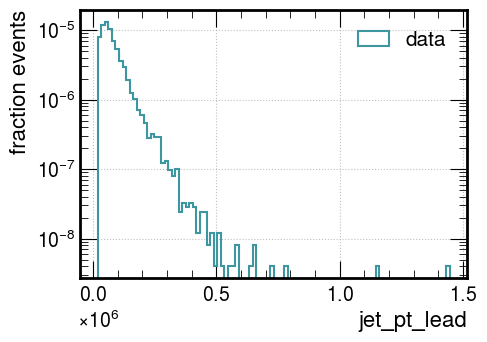

In [63]:
for ff in ['jet_pt_lead']:
    dd = [np.array(samples_concat[ff]).flatten()]
    sample_names = ['data']
    heplt.plot_feature_hist_for_n_samples(dd,sample_names,xlabel=ff,show_plt=True,legend_outside=False)

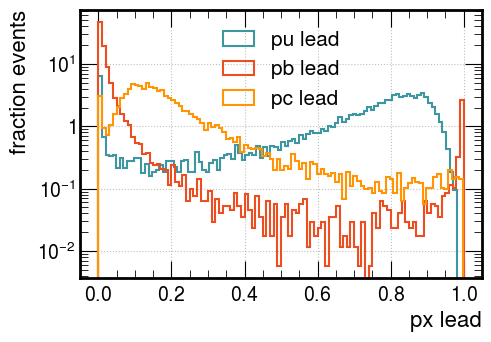

In [65]:
dd = [np.array(samples_concat['jet_GN2_pu_lead']).flatten(),np.array(samples_concat['jet_GN2_pb_lead']).flatten(),np.array(samples_concat['jet_GN2_pc_lead']).flatten()]
sample_names = ['pu lead','pb lead','pc lead']
heplt.plot_feature_hist_for_n_samples(dd,sample_names,xlabel='px lead',show_plt=True,legend_outside=False)

In [80]:
dir(samples_concat)

['HLT_e140_lhloose_nod0',
 'HLT_e26_lhtight_nod0_ivarloose',
 'HLT_e60_lhmedium_nod0',
 'HLT_mu26_ivarmedium',
 'HLT_mu50',
 'Mask',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__self__',
 '__self_class__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__thisclass__',
 '_attrs',
 '_behavior',
 '_cpp_type',
 '_layout',
 '_numbaview',
 'attrs',
 'backgroundFlags',
 'behavior',
 'cpp_type',
 'ee_2017',
 'el_CF',
 'el_charge',
 'el_cl_eta',
 'el_d0sig',
 'el_delta_z0_sintheta',
 'el_e',
 'el_eta',
 'el_phi',
 'el_pt',
 'el_ptvarcone20',
 'el_topoetcone20',
 'el_trigMatch_HLT_e140_lhloose_nod0',
 'el_trigMatch_HLT_e26_lhtight_nod0_ivarloose',
 'el_trigMatch_HLT_e60_lhmedium_nod0',
 'eventNumber',
 'fields',
 'hasBadMuon',
 'is_tuple',
 'jet_DL

In [46]:
path_data = glob.glob(os.path.join(stco.in_dir_data_run2,'*.root'))

In [47]:
fname_dat = os.path.join(stco.in_dir_data_run2,os.listdir(stco.in_dir_data_run2)[3])

In [48]:
fname_dat

'/eos/atlas/atlascerngroupdisk/perf-flavtag/calib/negtag/Rel24_GN2v01/Ntuples_Nominal/dataRun2_daod_ftag2/user.ltoffoli.data17_13T.periodAllYear.physics_Main.PhysCont.D_FTAG2.grp17_v01_p5981.GN2v01_Nom_output.root/user.ltoffoli.37402699._000004.output.root'

In [49]:
tree = uproot.open(fname_dat+':nominal')

In [50]:
tree.show(name_width=30, typename_width=20)

name                           | typename             | interpretation                
-------------------------------+----------------------+-------------------------------
eventNumber                    | uint64_t             | AsDtype('>u8')
runNumber                      | uint32_t             | AsDtype('>u4')
mcChannelNumber                | uint32_t             | AsDtype('>u4')
mu                             | float                | AsDtype('>f4')
mu_actual                      | float                | AsDtype('>f4')
mu_original_xAOD               | float                | AsDtype('>f4')
mu_actual_original_xAOD        | float                | AsDtype('>f4')
backgroundFlags                | uint32_t             | AsDtype('>u4')
hasBadMuon                     | uint32_t             | AsDtype('>u4')
el_pt                          | std::vector<float>   | AsJagged(AsDtype('>f4'), he...
el_eta                         | std::vector<float>   | AsJagged(AsDtype('>f4'), he...
el_cl_eta    

In [51]:
arr = tree.arrays()

In [60]:
arr[[None]]

<Array [None] type='1 * ?{eventNumber: uint64, runNumber: uint32, mcChannel...'>

In [20]:
for batch in uproot.iterate(stco.in_dir_data_run2+"/*.root:nominal",None,steps=100):
    print(batch)

[{eventNumber: 1471875199, runNumber: 330294, mcChannelNumber: 0, ...}, ...]
[{eventNumber: 1120391, runNumber: 326439, mcChannelNumber: 0, ...}, ..., {...}]
[{eventNumber: 1181432055, runNumber: 330294, mcChannelNumber: 0, ...}, ...]
[{eventNumber: 111735957, runNumber: 326468, mcChannelNumber: 0, ...}, ...]
[{eventNumber: 303546754, runNumber: 331082, mcChannelNumber: 0, ...}, ...]
[{eventNumber: 485783514, runNumber: 327761, mcChannelNumber: 0, ...}, ...]
[{eventNumber: 224264351, runNumber: 332896, mcChannelNumber: 0, ...}, ...]
[{eventNumber: 696477452, runNumber: 330166, mcChannelNumber: 0, ...}, ...]


KeyboardInterrupt: 

## MC

In [33]:
sig_ids = sum(stco.sig_ds_ids.values(),[])

In [32]:
os.listdir(os.path.join(stco.in_dir_mc_run2,os.listdir(stco.in_dir_mc_run2)[4]))

['user.ltoffoli.37306296._000001.output.root',
 'user.ltoffoli.37351516._000001.output.root']

In [39]:
sig_dir_paths = [os.path.join(stco.in_dir_mc_run2,dd) for dd in os.listdir(stco.in_dir_mc_run2) if re.search('|'.join(sig_ids), dd)]

In [40]:
sig_dir_paths

['/eos/atlas/atlascerngroupdisk/perf-flavtag/calib/negtag/Rel24_GN2v01/Ntuples_Nominal/mc20d/user.ltoffoli.mc20_13T.506193.MGPy8EG_Zee_FxFx_3jets_HT2bias_BF.D_FTAG2.e8382_s3681_r13144_p5981.GN2v01_Nom_output.root',
 '/eos/atlas/atlascerngroupdisk/perf-flavtag/calib/negtag/Rel24_GN2v01/Ntuples_Nominal/mc20d/user.ltoffoli.mc20_13T.506194.MGPy8EG_Zee_FxFx_3jets_HT2bias_CFBV.D_FTAG2.e8382_s3681_r13144_p5981.GN2v01_Nom_output.root',
 '/eos/atlas/atlascerngroupdisk/perf-flavtag/calib/negtag/Rel24_GN2v01/Ntuples_Nominal/mc20d/user.ltoffoli.mc20_13T.506195.MGPy8EG_Zee_FxFx_3jets_HT2bias_CVBV.D_FTAG2.e8382_s3681_r13144_p5981.GN2v01_Nom_output.root',
 '/eos/atlas/atlascerngroupdisk/perf-flavtag/calib/negtag/Rel24_GN2v01/Ntuples_Nominal/mc20d/user.ltoffoli.mc20_13T.506196.MGPy8EG_Zmumu_FxFx_3jets_HT2bias_BF.D_FTAG2.e8382_s3681_r13144_p5981.GN2v01_Nom_output.root',
 '/eos/atlas/atlascerngroupdisk/perf-flavtag/calib/negtag/Rel24_GN2v01/Ntuples_Nominal/mc20d/user.ltoffoli.mc20_13T.506197.MGPy8EG_Zmu

In [42]:
sig_file_names = [os.path.join(sig_dir_paths[1],ff) for ff in os.listdir(sig_dir_paths[1])]

In [43]:
tree = uproot.open(sig_file_names[2]+':nominal')

In [45]:
tree.show(name_width=30, typename_width=20, interpretation_width=24)

name                           | typename             | interpretation          
-------------------------------+----------------------+-------------------------
mc_generator_weights           | std::vector<float>   | AsJagged(AsDtype('>f4...
weight_mc                      | float                | AsDtype('>f4')
weight_pileup                  | float                | AsDtype('>f4')
weight_beamspot                | float                | AsDtype('>f4')
weight_leptonSF                | float                | AsDtype('>f4')
weight_trigger                 | float                | AsDtype('>f4')
weight_jvt                     | float                | AsDtype('>f4')
weight_pileup_UP               | float                | AsDtype('>f4')
weight_pileup_DOWN             | float                | AsDtype('>f4')
weight_leptonSF_EL_SF_Reco_UP  | float                | AsDtype('>f4')
weight_leptonSF_EL_SF_Reco_... | float                | AsDtype('>f4')
weight_leptonSF_EL_SF_ID_UP    | float         

In [15]:
sum(stco.sig_ds_ids.values(),[])

['506193',
 '506194',
 '506195',
 '506196',
 '506197',
 '506198',
 '512198',
 '512199',
 '512200']

In [20]:
r'|'.join(sig_ids)+')'

'(506193|506194|506195|506196|506197|506198|512198|512199|512200)'